<a href="https://colab.research.google.com/github/lognamin/Analysis-of-Life-Expectancy/blob/main/The_Analysis_of_Life_Expectancy_based_on_Health%2C_Environmental_and_Social_Economic_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Analysis of Life Expectancy based on Health, Environmental and Social-Economic Factors.


|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import sklearn.linear_model
import scipy, scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import statsmodels.formula.api as sm
import statsmodels.api as sm2
import seaborn as sns
import math
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

In [ ]:
df=pd.read_csv('Life_Expectancy_Data.csv', header=0, skipinitialspace=True,
                         sep=',')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

   BMI   under-five deaths   Polio  Total expenditure  Diphtheria   HIV/AIDS  \
0  19.1                  83    6.0               8.16         65.0       0.1   
1  18.6                  86   58.0               8.18         62.0       0.1   
2  18.1                  89   62.0               8.13         64.0       0.1   
3  17.6                  93   67.0               8.52         67.0       0.1   
4  17.2                  97   68.0               7.87         68.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [ ]:
df.rename(columns={"Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles","BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria", "HIV/AIDS":'HIV',
                  "thinness  1-19 years":"thinness_1to19_years","thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [ ]:
#Master Data save
df_master = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

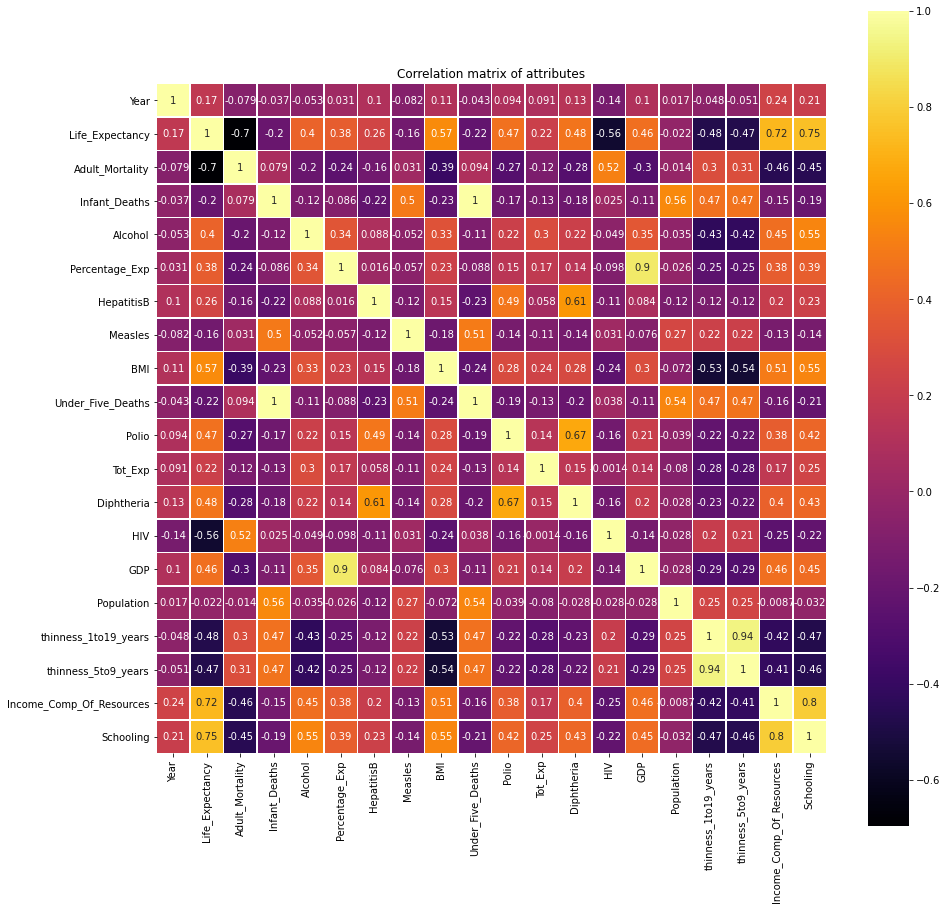

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method='pearson'), cmap='inferno', square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix of attributes")
plt.show()

#### Health - Immunization Analysis - START

In [ ]:
df3 = df[['HepatitisB','Measles','Diphtheria','Infant_Deaths','Life_Expectancy']]
df3 = df3.dropna()
df3

HepatitisB  Measles  Diphtheria  Infant_Deaths  Life_Expectancy
0           65.0     1154        65.0             62             65.0
1           62.0      492        62.0             64             59.9
2           64.0      430        64.0             66             59.9
3           67.0     2787        67.0             69             59.5
4           68.0     3013        68.0             71             59.2
5           66.0     1989        66.0             74             58.8
6           63.0     2861        63.0             77             58.6
7           64.0     1599        64.0             80             58.1
8           63.0     1141        63.0             82             57.5
9           64.0     1990        58.0             84             57.3
10          66.0     1296        58.0             85             57.3
11          67.0      466         5.0             87             57.0
12          65.0      798        41.0             87             56.7
13          64.0     2486        36.0             88             56.2
14          63.0     8762        33.0             88             55.3
15          62.0     6532        24.0             88             54.8
16          99.0        0        99.0              0             77.8
17          98.0        0        98.0              0             77.5
18          99.0        0        99.0              0             77.2
19          99.0        9        99.0              0             76.9
20          99.0       28        99.0              0             76.6
21          99.0       10        99.0              1             76.2
22          98.0        0        98.0              1             76.1
23          99.0        0        99.0              1             75.3
24          98.0       22        98.0              1             75.9
25          98.0       68        97.0              1             74.2
26          98.0        6        98.0              1             73.5
27          99.0        7        97.0              1             73.0
28          97.0        8        97.0              1             72.8
29          96.0       16        98.0              1             73.3
30          96.0       18        97.0              1             73.6
31          96.0      662        97.0              1             72.6
32          95.0       63        95.0             21             75.6
33          95.0        0        95.0             21             75.4
34          95.0       25        95.0             21             75.3
35          95.0       18        95.0             21             75.1
36          95.0      112        95.0             21             74.9
37          95.0      103        95.0             21             74.7
38          94.0      107        95.0             20             74.4
39          91.0      217        93.0             20             74.1
40           9.0        0        95.0             20             73.8
41           8.0      944        95.0             20             73.4
42          83.0     2302        88.0             19             72.9
43          81.0     3289        86.0             19             72.3
48          64.0      118        64.0             66             52.4
49          64.0    11699        64.0             67             51.7
50          77.0     8523        77.0             69             51.1
51          75.0     4458        75.0             72             56.0
52          72.0     1449        71.0             75             51.0
53          77.0     1190        77.0             78             49.6
54          61.0     2807         6.0             81             49.1
55          69.0      265        69.0             84             48.7
56          73.0     1014        73.0             87             48.2
64          99.0        0        99.0              0             76.4
65          99.0        0        99.0              0             76.2
66          99.0        0        99.0              0             76.1
67          98.0

Wall time: 4.7 s


<Figure size 1080x720 with 0 Axes>

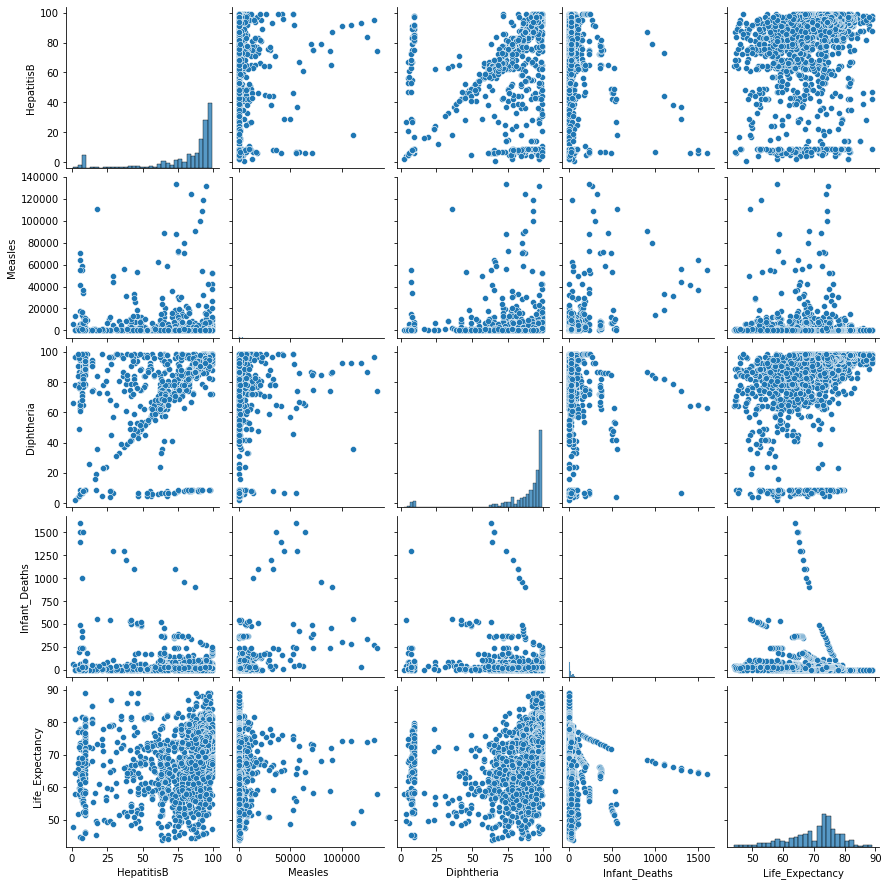

In [ ]:
%%time
plt.figure(figsize=(15,10))
g = sns.pairplot(df3)
#g.savefig("seaborn pairplot.png")

C:\Users\harth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HepatitisB', ylabel='Life_Expectancy'>

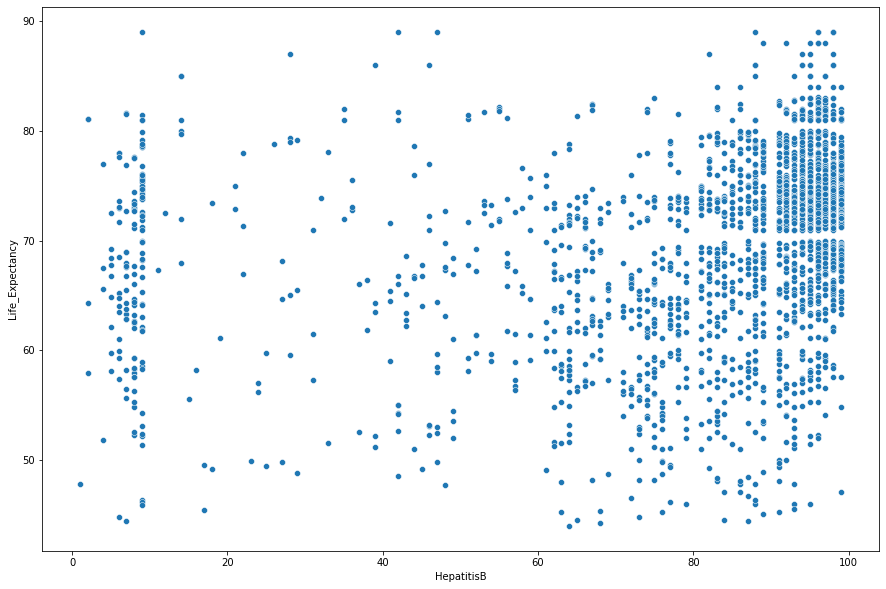

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot('HepatitisB', 'Life_Expectancy', data=df3)

In [ ]:
m = sm.ols('Life_Expectancy ~ Infant_Deaths + Diphtheria + Measles', data = df3)
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     142.0
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.31e-84
Time:                        21:18:55   Log-Likelihood:                -8235.0
No. Observations:                2375   AIC:                         1.648e+04
Df Residuals:                    2371   BIC:                         1.650e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.8663      0.668     88.145      0.000      57.557      60.176
Infant_Deaths    -0.0115      0.002     -6.344      0.000      -0.015      -0.008
Diphtheria        0.1342      0.008     17.801      0.000       0.119       0.149
Measles        3.977e-06   1.97e-05      0.202      0.840   -3.47e-05    4.26e-05
==============================================================================
Omnibus:                      166.342   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.666
Skew:                          -0.650   Prob(JB):                     8.05e-46
Kurtosis:                       3.639   Cond. No.                     4.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

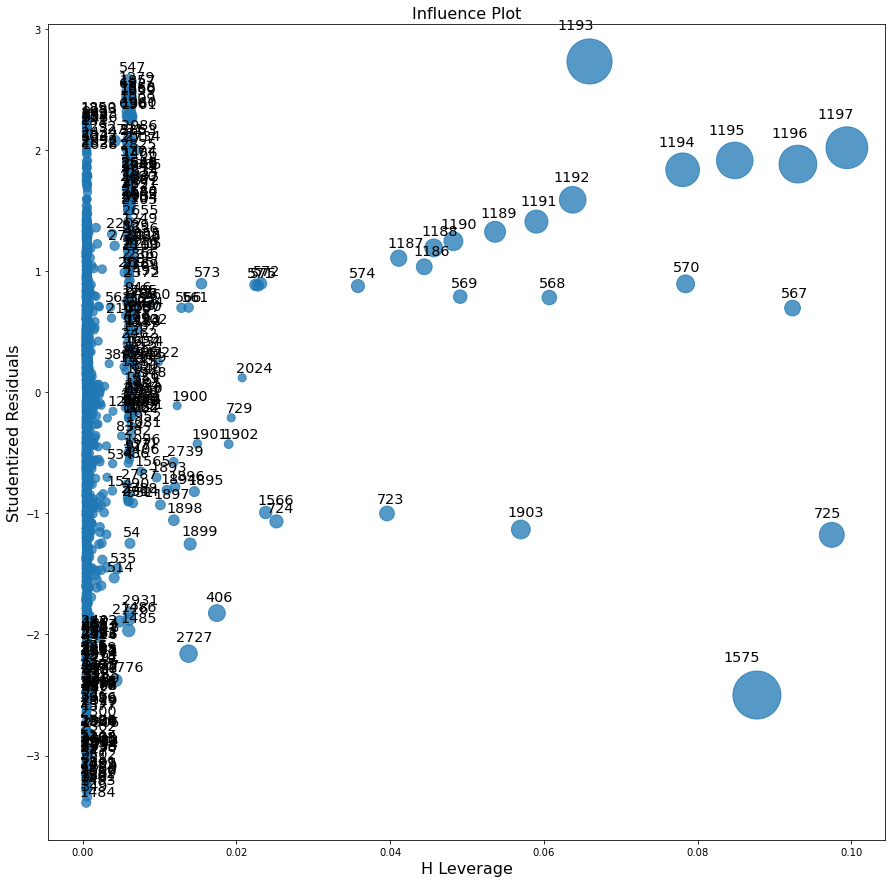

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
fig = influence_plot(m, ax=ax)

In [ ]:
df3=df3.drop([df3.index[1193],df3.index[1575]])
print(len(df3))

2373


In [ ]:
m_clean = sm.ols('Life_Expectancy ~ Infant_Deaths + Diphtheria + Measles', data = df3).fit()
m_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     144.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           7.30e-86
Time:                        21:19:00   Log-Likelihood:                -8222.1
No. Observations:                2373   AIC:                         1.645e+04
Df Residuals:                    2369   BIC:                         1.648e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.7529      0.668     87.923      0.000      57.443      60.063
Infant_Deaths    -0.0115      0.002     -6.332      0.000      -0.015      -0.008
Diphtheria        0.1355      0.008     17.973      0.000       0.121       0.150
Measles        3.859e-06   1.97e-05      0.196      0.844   -3.47e-05    4.24e-05
==============================================================================
Omnibus:                      165.343   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.359
Skew:                          -0.648   Prob(JB):                     1.55e-45
Kurtosis:                       3.640   Cond. No.                     4.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

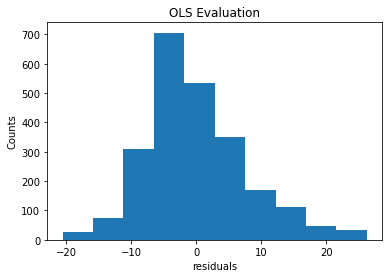

RMSE: 7.736318894455919


In [ ]:
df3['Life_Expectancy_Pred']=m_clean.predict(df3)
df3['Residuals']= df3['Life_Expectancy_Pred'] - df3['Life_Expectancy']

plt.hist('Residuals', data=df3)
plt.title('OLS Evaluation')
plt.xlabel('residuals')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(sum(df3['Residuals']**2)/len(df3)))

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HepatitisB            2373 non-null   float64
 1   Measles               2373 non-null   int64  
 2   Diphtheria            2373 non-null   float64
 3   Infant_Deaths         2373 non-null   int64  
 4   Life_Expectancy       2373 non-null   float64
 5   Life_Expectancy_Pred  2373 non-null   float64
 6   Residuals             2373 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 148.3 KB


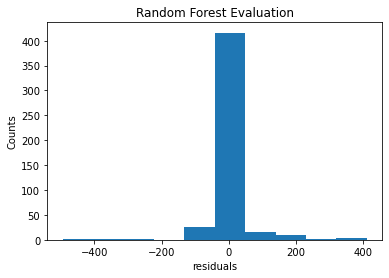

RMSE: 58.28177798486027


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X=df3.iloc[:,0:3]
y=df3.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor_neg = RandomForestRegressor(n_estimators=10, random_state=0)
regressor_neg.fit(X_train, y_train)
y_pred = regressor_neg.predict(X_test)

residue =y_pred-y_test
plt.hist(residue)
plt.title('Random Forest Evaluation')
plt.xlabel('residuals')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
df4 = df[['HepatitisB','Measles','Diphtheria','Infant_Deaths','Life_Expectancy']]
df4 = df4.dropna()
df4

HepatitisB  Measles  Diphtheria  Infant_Deaths  Life_Expectancy
0           65.0     1154        65.0             62             65.0
1           62.0      492        62.0             64             59.9
2           64.0      430        64.0             66             59.9
3           67.0     2787        67.0             69             59.5
4           68.0     3013        68.0             71             59.2
5           66.0     1989        66.0             74             58.8
6           63.0     2861        63.0             77             58.6
7           64.0     1599        64.0             80             58.1
8           63.0     1141        63.0             82             57.5
9           64.0     1990        58.0             84             57.3
10          66.0     1296        58.0             85             57.3
11          67.0      466         5.0             87             57.0
12          65.0      798        41.0             87             56.7
13          64.0     2486        36.0             88             56.2
14          63.0     8762        33.0             88             55.3
15          62.0     6532        24.0             88             54.8
16          99.0        0        99.0              0             77.8
17          98.0        0        98.0              0             77.5
18          99.0        0        99.0              0             77.2
19          99.0        9        99.0              0             76.9
20          99.0       28        99.0              0             76.6
21          99.0       10        99.0              1             76.2
22          98.0        0        98.0              1             76.1
23          99.0        0        99.0              1             75.3
24          98.0       22        98.0              1             75.9
25          98.0       68        97.0              1             74.2
26          98.0        6        98.0              1             73.5
27          99.0        7        97.0              1             73.0
28          97.0        8        97.0              1             72.8
29          96.0       16        98.0              1             73.3
30          96.0       18        97.0              1             73.6
31          96.0      662        97.0              1             72.6
32          95.0       63        95.0             21             75.6
33          95.0        0        95.0             21             75.4
34          95.0       25        95.0             21             75.3
35          95.0       18        95.0             21             75.1
36          95.0      112        95.0             21             74.9
37          95.0      103        95.0             21             74.7
38          94.0      107        95.0             20             74.4
39          91.0      217        93.0             20             74.1
40           9.0        0        95.0             20             73.8
41           8.0      944        95.0             20             73.4
42          83.0     2302        88.0             19             72.9
43          81.0     3289        86.0             19             72.3
48          64.0      118        64.0             66             52.4
49          64.0    11699        64.0             67             51.7
50          77.0     8523        77.0             69             51.1
51          75.0     4458        75.0             72             56.0
52          72.0     1449        71.0             75             51.0
53          77.0     1190        77.0             78             49.6
54          61.0     2807         6.0             81             49.1
55          69.0      265        69.0             84             48.7
56          73.0     1014        73.0             87             48.2
64          99.0        0        99.0              0             76.4
65          99.0        0        99.0              0             76.2
66          99.0        0        99.0              0             76.1
67          98.0

In [ ]:
m = sm.ols('Life_Expectancy ~ Infant_Deaths + Diphtheria + Measles', data = df4)
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     142.0
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.31e-84
Time:                        21:19:01   Log-Likelihood:                -8235.0
No. Observations:                2375   AIC:                         1.648e+04
Df Residuals:                    2371   BIC:                         1.650e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.8663      0.668     88.145      0.000      57.557      60.176
Infant_Deaths    -0.0115      0.002     -6.344      0.000      -0.015      -0.008
Diphtheria        0.1342      0.008     17.801      0.000       0.119       0.149
Measles        3.977e-06   1.97e-05      0.202      0.840   -3.47e-05    4.26e-05
==============================================================================
Omnibus:                      166.342   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.666
Skew:                          -0.650   Prob(JB):                     8.05e-46
Kurtosis:                       3.639   Cond. No.                     4.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

HepatitisB          20.0
Measles            289.5
Diphtheria          15.0
Infant_Deaths       21.0
Life_Expectancy     10.3
dtype: float64


In [ ]:
lower_bound_value = Q1 - (1.5 * IQR)
upper_bound_value = Q3 + (1.5 * IQR)

In [ ]:
df4_out = df4[~((df4 < lower_bound_value) |(df4 > upper_bound_value)).any(axis=1)]

In [ ]:
m = sm.ols('Life_Expectancy ~ Infant_Deaths + Diphtheria + Measles', data = df4_out)
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           7.43e-89
Time:                        21:19:01   Log-Likelihood:                -5125.8
No. Observations:                1605   AIC:                         1.026e+04
Df Residuals:                    1601   BIC:                         1.028e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.1492      1.824     29.135      0.000      49.571      56.727
Infant_Deaths    -0.2393      0.016    -15.051      0.000      -0.270      -0.208
Diphtheria        0.2201      0.019     11.308      0.000       0.182       0.258
Measles           0.0021      0.001      1.708      0.088      -0.000       0.004
==============================================================================
Omnibus:                       69.091   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.395
Skew:                          -0.453   Prob(JB):                     2.86e-19
Kurtosis:                       3.676   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

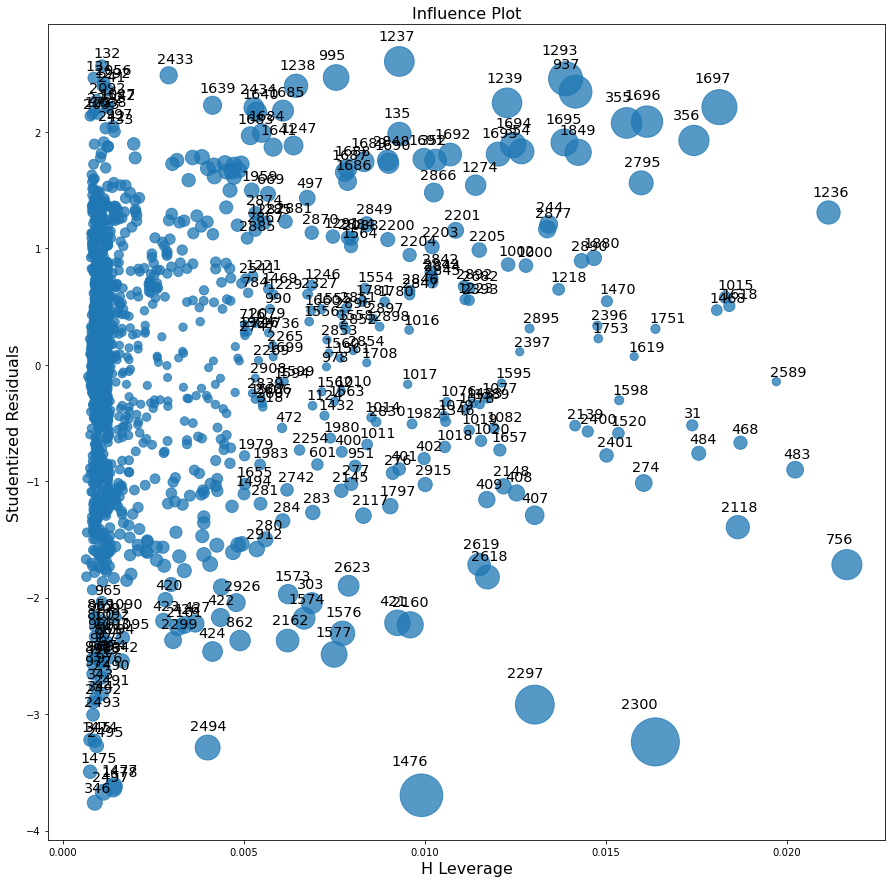

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
fig = influence_plot(m, ax=ax)

In [ ]:
#df4=df4.drop([df4.index[1193],df4.index[1575]])
#print(len(df4))

In [ ]:
m_clean = sm.ols('Life_Expectancy ~ Infant_Deaths + Diphtheria + Measles', data = df4_out).fit()
m_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           7.43e-89
Time:                        21:19:04   Log-Likelihood:                -5125.8
No. Observations:                1605   AIC:                         1.026e+04
Df Residuals:                    1601   BIC:                         1.028e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.1492      1.824     29.135      0.000      49.571      56.727
Infant_Deaths    -0.2393      0.016    -15.051      0.000      -0.270      -0.208
Diphtheria        0.2201      0.019     11.308      0.000       0.182       0.258
Measles           0.0021      0.001      1.708      0.088      -0.000       0.004
==============================================================================
Omnibus:                       69.091   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.395
Skew:                          -0.453   Prob(JB):                     2.86e-19
Kurtosis:                       3.676   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-378-3d0ff458808b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_out['Life_Expectancy_Pred']=m_clean.predict(df4_out)
<ipython-input-378-3d0ff458808b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_out['Residuals']= df4_out['Life_Expectancy_Pred'] - df4_out['Life_Expectancy']


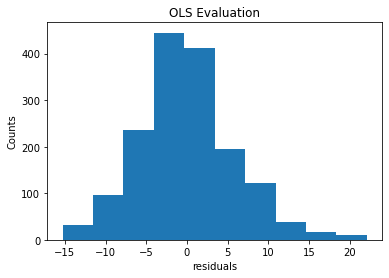

RMSE: 5.898528363024044


In [ ]:
df4_out['Life_Expectancy_Pred']=m_clean.predict(df4_out)
df4_out['Residuals']= df4_out['Life_Expectancy_Pred'] - df4_out['Life_Expectancy']

plt.hist('Residuals', data=df4_out)
plt.title('OLS Evaluation')
plt.xlabel('residuals')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(sum(df4_out['Residuals']**2)/len(df4_out)))

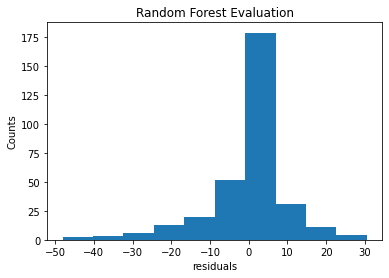

RMSE: 10.1012510250323


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X=df4_out.iloc[:,0:3]
y=df4_out.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor_neg = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_neg.fit(X_train, y_train)
y_pred = regressor_neg.predict(X_test)

residue =y_pred-y_test
plt.hist(residue)
plt.title('Random Forest Evaluation')
plt.xlabel('residuals')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#### Health - Immunization Analysis - END

### ###########################################################

#### Health - Non-Immunization Analysis - START

In [ ]:
df = df_master

In [ ]:
# Throw an extra column on there that covert values 'Developing' and 'Developed' of Status as 0 and 1 respectively, which can faciliate our further analysis.

df['bool_status'] = df['Status']
s = {'Developing': 0, 'Developed': 1}
df['bool_status'] = df['bool_status'].map(s)
df['bool_status'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: bool_status, dtype: int64

In [ ]:
# We notice that the above matrix does not contain the attribute 'Country' and 'Status', whose values are object. 
# We want to know if the status affect the Life expectancy, therefore we apply the student T test.

df_obj=df[['Country','Status','Life_Expectancy']]  # extract the data with the two object attributes and Life_Expectancy.
df_obj=df_obj.dropna()
Developed=df_obj.loc[df_obj['Status']=='Developed','Life_Expectancy']
Developing=df_obj.loc[df_obj['Status']=='Developing','Life_Expectancy']

scipy.stats.ttest_ind(Developed, Developing)

# The P-value is very small, meaning there is significant different developed and developing countries in terms of life expectancy.

Ttest_indResult(statistic=29.76836505889292, pvalue=2.4650861700062064e-170)

In [ ]:
df_imm=df[['HepatitisB','Diphtheria','Polio','Life_Expectancy']]
df_imm=df_imm.dropna()
df_imm.reset_index(drop=True, inplace=True)
df_imm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HepatitisB       2375 non-null   float64
 1   Diphtheria       2375 non-null   float64
 2   Polio            2375 non-null   float64
 3   Life_Expectancy  2375 non-null   float64
dtypes: float64(4)
memory usage: 74.3 KB


In [ ]:
m_imm = sm.ols('Life_Expectancy ~ HepatitisB + Diphtheria + Polio', data = df_imm).fit()
m_imm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     156.1
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.56e-92
Time:                        21:19:05   Log-Likelihood:                -8217.2
No. Observations:                2375   AIC:                         1.644e+04
Df Residuals:                    2371   BIC:                         1.647e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.7942      0.724     75.724      0.000      53.375      56.213
HepatitisB     0.0034      0.008      0.421      0.674      -0.013       0.019
Diphtheria     0.0909      0.010      8.877      0.000       0.071       0.111
Polio          0.0844      0.009      9.244      0.000       0.067       0.102
==============================================================================
Omnibus:                      157.010   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.633
Skew:                          -0.619   Prob(JB):                     2.00e-43
Kurtosis:                       3.674   Cond. No.                         680.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m_imm = sm.ols('Life_Expectancy ~ Diphtheria + Polio', data = df_imm).fit()
m_imm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.62e-93
Time:                        21:19:05   Log-Likelihood:                -8217.3
No. Observations:                2375   AIC:                         1.644e+04
Df Residuals:                    2372   BIC:                         1.646e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.8380      0.716     76.593      0.000      53.434      56.242
Diphtheria     0.0929      0.009     10.225      0.000       0.075       0.111
Polio          0.0852      0.009      9.519      0.000       0.068       0.103
==============================================================================
Omnibus:                      157.436   Durbin-Watson:                   0.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.280
Skew:                          -0.620   Prob(JB):                     1.45e-43
Kurtosis:                       3.675   Cond. No.                         557.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

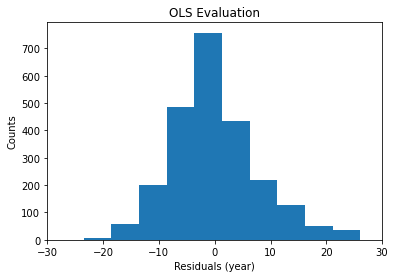

RMSE: 7.697983593373859


In [ ]:
df_imm['Life_Expectancy_Pred']=m_imm.predict(df_imm)
df_imm['Residuals']= df_imm['Life_Expectancy_Pred'] - df_imm['Life_Expectancy']

plt.hist('Residuals', data=df_imm)
plt.title('OLS Evaluation')
plt.xlim(-30,30)
plt.xlabel('Residuals (year)')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(sum(df_imm['Residuals']**2)/len(df_imm)))

In [ ]:
df_imm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HepatitisB            2375 non-null   float64
 1   Diphtheria            2375 non-null   float64
 2   Polio                 2375 non-null   float64
 3   Life_Expectancy       2375 non-null   float64
 4   Life_Expectancy_Pred  2375 non-null   float64
 5   Residuals             2375 non-null   float64
dtypes: float64(6)
memory usage: 111.5 KB


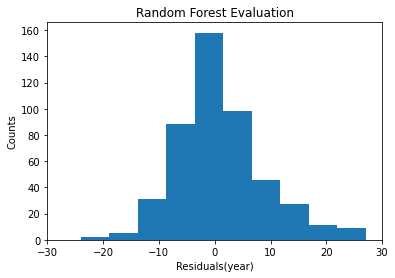

RMSE: 7.883125658950212


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X=df_imm.iloc[:,1:3]
y=df_imm.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor_imm = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_imm.fit(X_train, y_train)
y_pred = regressor_imm.predict(X_test)

residue =y_pred-y_test
plt.hist(residue)
plt.title('Random Forest Evaluation')
plt.xlim(-30,30)
plt.xlabel('Residuals(year)')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
df_imm_o1=df_imm
Q1_imm = df_imm_o1.quantile(0.25)
Q2_imm =df_imm_o1.quantile(0.75)
IQR = Q2_imm - Q1_imm

print(IQR)
lower_bound_val = Q1_imm - (1.5 * IQR) 
upper_bound_val = Q2_imm + (1.5 * IQR)
df_imm_clean = df_imm_o1[~((df_imm_o1 < lower_bound_val) |(df_imm_o1 > upper_bound_val)).any(axis=1)]

m_imm_clean = sm.ols('Life_Expectancy ~ Diphtheria + Polio', data = df_imm_clean).fit()

m_imm_clean.summary()

HepatitisB              20.000000
Diphtheria              15.000000
Polio                   15.000000
Life_Expectancy         10.300000
Life_Expectancy_Pred     2.926611
Residuals                9.121872
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     282.7
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          3.08e-108
Time:                        21:19:06   Log-Likelihood:                -6194.2
No. Observations:                1906   AIC:                         1.239e+04
Df Residuals:                    1903   BIC:                         1.241e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2160      1.532     22.991      0.000      32.212      38.220
Diphtheria     0.2239      0.054      4.169      0.000       0.119       0.329
Polio          0.1716      0.052      3.289      0.001       0.069       0.274
==============================================================================
Omnibus:                       35.371   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.207
Skew:                          -0.320   Prob(JB):                     8.33e-09
Kurtosis:                       3.241   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-390-e7e3d21f8322>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imm_clean['Life_Expectancy_Pred']=m_imm_clean.predict(df_imm)
<ipython-input-390-e7e3d21f8322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imm_clean['Residuals2']= df_imm_clean['Life_Expectancy_Pred'] - df_imm_clean['Life_Expectancy']


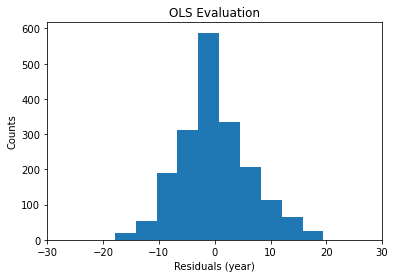

RMSE: 6.239488405197874


In [ ]:
df_imm_clean['Life_Expectancy_Pred']=m_imm_clean.predict(df_imm)
df_imm_clean['Residuals2']= df_imm_clean['Life_Expectancy_Pred'] - df_imm_clean['Life_Expectancy']

plt.hist('Residuals2', data=df_imm_clean)
plt.title('OLS Evaluation')
plt.xlim(-30,30)
plt.xlabel('Residuals (year)')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(sum(df_imm_clean['Residuals2']**2)/len(df_imm_clean)))

In [ ]:
df_fin=df[['Schooling','Adult_Mortality','Income_Comp_Of_Resources','Life_Expectancy']]
df_fin=df_fin.dropna()
df_fin.reset_index(drop=True, inplace=True)
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Schooling                 2768 non-null   float64
 1   Adult_Mortality           2768 non-null   float64
 2   Income_Comp_Of_Resources  2768 non-null   float64
 3   Life_Expectancy           2768 non-null   float64
dtypes: float64(4)
memory usage: 86.6 KB


In [ ]:
m_fin = sm.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Comp_Of_Resources', data = df_fin).fit()

m_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     2530.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:06   Log-Likelihood:                -8289.8
No. Observations:                2768   AIC:                         1.659e+04
Df Residuals:                    2764   BIC:                         1.661e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   55.0551      0.464    118.599      0.000      54.145      55.965
Schooling                    1.0598      0.046     22.811      0.000       0.969       1.151
Adult_Mortality             -0.0308      0.001    -36.046      0.000      -0.032      -0.029
Income_Comp_Of_Resources    10.5053      0.738     14.230      0.000       9.058      11.953
==============================================================================
Omnibus:                      423.902   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2896.168
Skew:                          -0.537   Prob(JB):                         0.00
Kurtosis:                       7.895   Cond. No.                     1.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

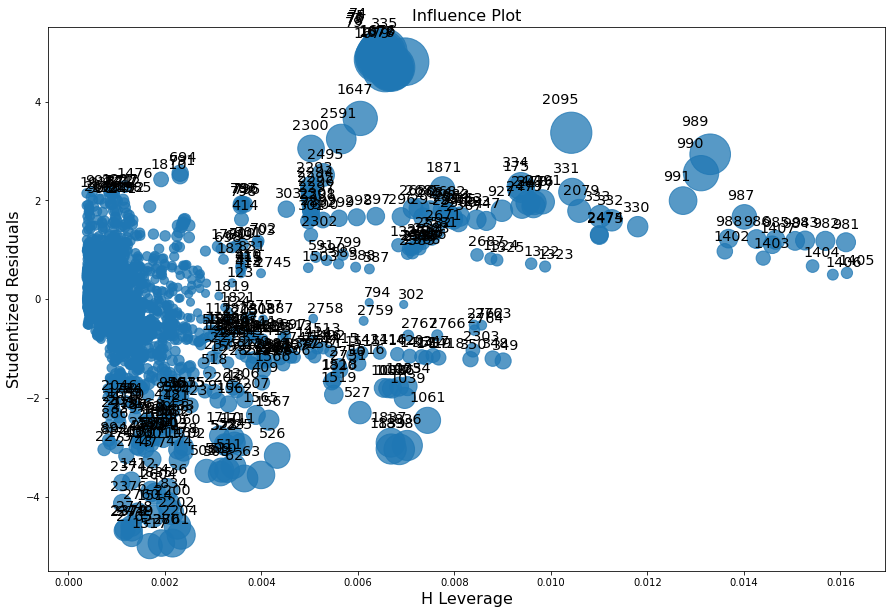

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
fig = influence_plot(m_fin, ax=ax)

In [ ]:
df_fin_o1=df_fin
Q1_fin = df_fin_o1.quantile(0.25)
Q2_fin =df_fin_o1.quantile(0.75)
IQR = Q2_fin - Q1_fin

print(IQR)
lower_bound_val = Q1_fin - (1.5 * IQR) 
upper_bound_val = Q2_fin + (1.5 * IQR)
df_fin_clean = df_fin_o1[~((df_fin_o1 < lower_bound_val) |(df_fin_o1 > upper_bound_val)).any(axis=1)]

m_fin_clean = sm.ols('Life_Expectancy ~ Schooling + Adult_Mortality + Income_Comp_Of_Resources', data = df_fin_clean).fit()

m_fin_clean.summary()

Schooling                     4.20000
Adult_Mortality             152.00000
Income_Comp_Of_Resources      0.28625
Life_Expectancy              12.00000
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     4110.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:11   Log-Likelihood:                -6807.3
No. Observations:                2541   AIC:                         1.362e+04
Df Residuals:                    2537   BIC:                         1.365e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   44.3293      0.448     98.944      0.000      43.451      45.208
Schooling                   -0.2999      0.060     -5.034      0.000      -0.417      -0.183
Adult_Mortality             -0.0155      0.001    -18.485      0.000      -0.017      -0.014
Income_Comp_Of_Resources    48.0323      1.223     39.265      0.000      45.634      50.431
==============================================================================
Omnibus:                      239.466   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.861
Skew:                          -0.483   Prob(JB):                    3.26e-159
Kurtosis:                       5.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
m_fin_clean = sm.ols('Life_Expectancy ~ Schooling + Adult_Mortality', data = df_fin_clean).fit()

m_fin_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     3357.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:11   Log-Likelihood:                -7410.6
No. Observations:                2541   AIC:                         1.483e+04
Df Residuals:                    2538   BIC:                         1.484e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          52.1681      0.508    102.601      0.000      51.171      53.165
Schooling           1.7997      0.033     54.060      0.000       1.734       1.865
Adult_Mortality    -0.0265      0.001    -26.500      0.000      -0.028      -0.025
==============================================================================
Omnibus:                      437.737   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1167.425
Skew:                          -0.923   Prob(JB):                    3.14e-254
Kurtosis:                       5.761   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

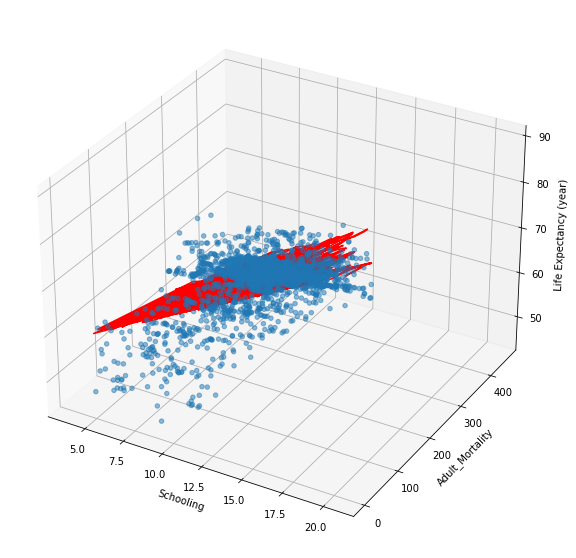

In [ ]:
plt.figure(figsize=(15,10))

ax = plt.axes(projection='3d')

Pred=1.7997*df_fin_clean['Schooling'] - 0.0265*df_fin_clean['Adult_Mortality'] + 52.1681
ax.plot3D(df_fin_clean['Schooling'], df_fin_clean['Adult_Mortality'], Pred,'red')

ax.scatter3D(df_fin_clean['Schooling'], df_fin_clean['Adult_Mortality'],df_fin_clean['Life_Expectancy'], alpha=0.5)
plt.xlabel("Schooling")
plt.ylabel("Adult_Mortality")
ax.set_zlabel('Life Expectancy (year)')
plt.show()

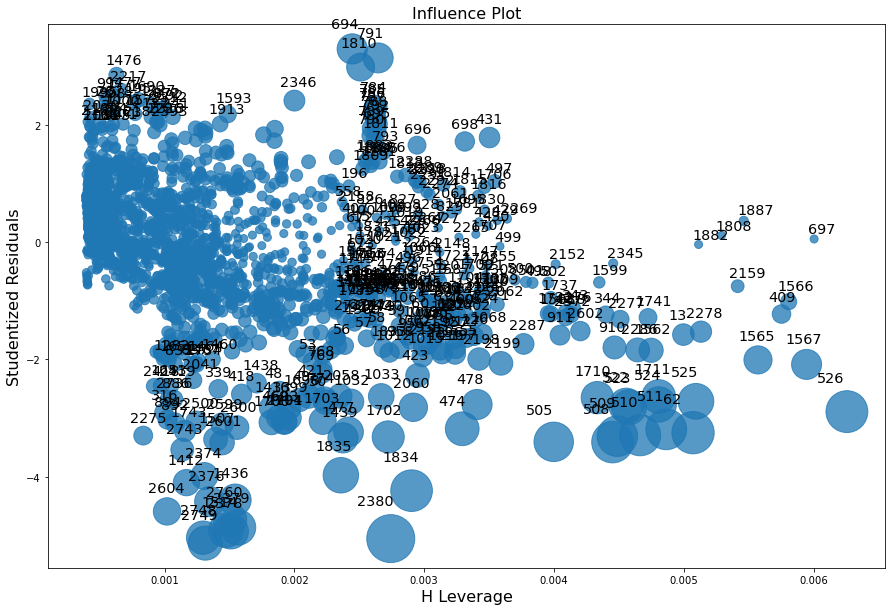

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
fig = influence_plot(m_fin_clean, ax=ax)

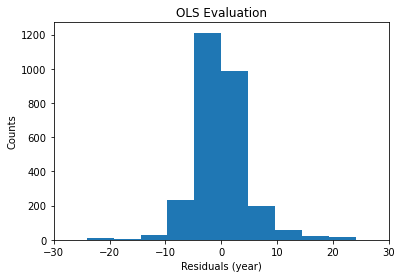

RMSE: 4.835270814915836


In [ ]:
df_fin['Life_Expectancy_Pred']=m_fin.predict(df_fin)
df_fin['Residuals']= df_fin['Life_Expectancy_Pred'] - df_fin['Life_Expectancy']

plt.hist('Residuals', data=df_fin)
plt.title('OLS Evaluation')
plt.xlim(-30,30)
plt.xlabel('Residuals (year)')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(sum(df_fin['Residuals']**2)/len(df_fin)))

In [ ]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Schooling                 2768 non-null   float64
 1   Adult_Mortality           2768 non-null   float64
 2   Income_Comp_Of_Resources  2768 non-null   float64
 3   Life_Expectancy           2768 non-null   float64
 4   Life_Expectancy_Pred      2768 non-null   float64
 5   Residuals                 2768 non-null   float64
dtypes: float64(6)
memory usage: 129.9 KB


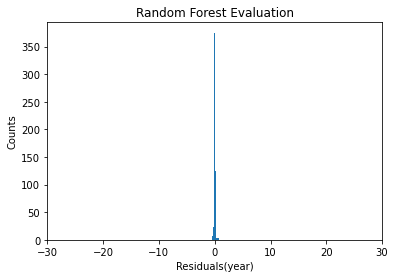

RMSE: 0.12521359177998242


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X=df_fin.iloc[:,0:2]
y=df_fin.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor_fin = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_fin.fit(X_train, y_train)
y_pred = regressor_fin.predict(X_test)

residue =y_pred-y_test
plt.hist(residue)
plt.title('Random Forest Evaluation')
plt.xlim(-30,30)
plt.xlabel('Residuals(year)')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
# Let's first look the following three social economical factors that highly correlated with the life expectancy.
df_SE=df[['Schooling','Income_Comp_Of_Resources','Life_Expectancy']]
df_SE=df_SE.dropna()
df_SE.reset_index(drop=True, inplace=True)
df_SE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Schooling                 2768 non-null   float64
 1   Income_Comp_Of_Resources  2768 non-null   float64
 2   Life_Expectancy           2768 non-null   float64
dtypes: float64(3)
memory usage: 65.0 KB


In [ ]:
m_SE = sm.ols('Life_Expectancy ~ Schooling + Income_Comp_Of_Resources', data = df_SE).fit()

m_SE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2141.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:17   Log-Likelihood:                -8823.1
No. Observations:                2768   AIC:                         1.765e+04
Df Residuals:                    2765   BIC:                         1.767e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   43.7724      0.416    105.330      0.000      42.958      44.587
Schooling                    1.3377      0.056     24.083      0.000       1.229       1.447
Income_Comp_Of_Resources    15.1822      0.881     17.233      0.000      13.455      16.910
==============================================================================
Omnibus:                      257.627   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1572.260
Skew:                          -0.192   Prob(JB):                         0.00
Kurtosis:                       6.672   Cond. No.                         99.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

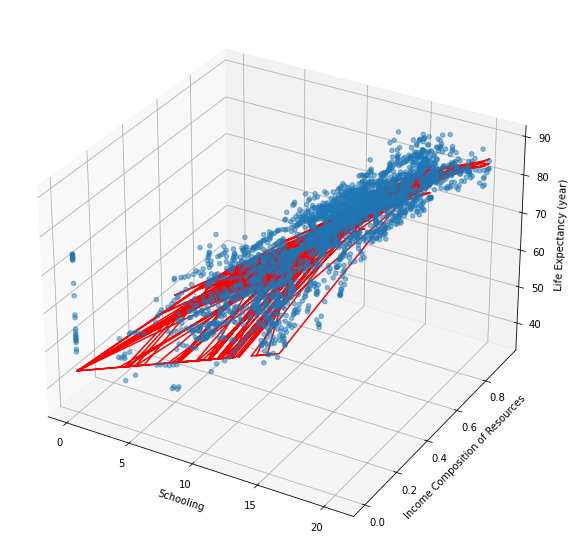

In [ ]:
plt.figure(figsize=(15,10))

ax = plt.axes(projection='3d')

Pred=1.3377*df_SE['Schooling'] + 15.1822*df_SE['Income_Comp_Of_Resources'] + 43.7724
ax.plot3D(df_SE['Schooling'], df_SE['Income_Comp_Of_Resources'], Pred,'red')

ax.scatter3D(df_SE['Schooling'], df_SE['Income_Comp_Of_Resources'],df_SE['Life_Expectancy'], alpha=0.5)
plt.xlabel("Schooling")
plt.ylabel("Income Composition of Resources")
ax.set_zlabel('Life Expectancy (year)')
plt.show()

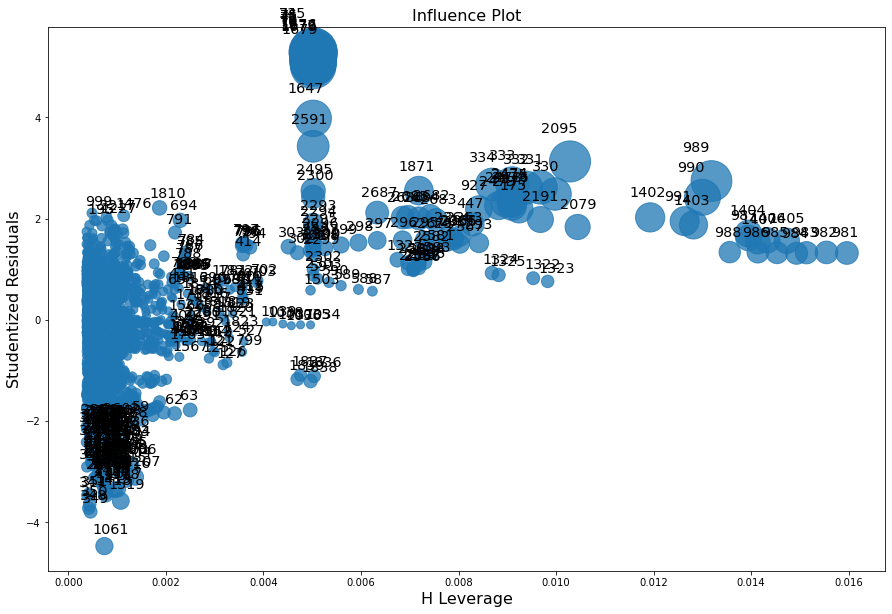

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
fig = influence_plot(m_SE, ax=ax)

In [ ]:
df_SE_o1=df_SE
Q1 = df_SE_o1.quantile(0.25)
Q3 =df_SE_o1.quantile(0.75)
IQR = Q3 - Q1

print(IQR)
lower_bound_val = Q1 - (1.5 * IQR) 
upper_bound_val = Q3 + (1.5 * IQR)
df_SE_out = df_SE_o1[~((df_SE_o1 < lower_bound_val) |(df_SE_o1 > upper_bound_val)).any(axis=1)]

m_SE_out = sm.ols('Life_Expectancy ~ Schooling + Income_Comp_Of_Resources', data = df_SE_out).fit()

m_SE_out.summary()

Schooling                    4.20000
Income_Comp_Of_Resources     0.28625
Life_Expectancy             12.00000
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     5075.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:22   Log-Likelihood:                -7325.2
No. Observations:                2600   AIC:                         1.466e+04
Df Residuals:                    2597   BIC:                         1.467e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   37.1166      0.342    108.613      0.000      36.447      37.787
Schooling                   -0.6369      0.066     -9.590      0.000      -0.767      -0.507
Income_Comp_Of_Resources    61.2734      1.275     48.039      0.000      58.772      63.774
==============================================================================
Omnibus:                      223.108   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.989
Skew:                          -0.581   Prob(JB):                     8.55e-93
Kurtosis:                       4.601   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Since the index from the influence plot is messy and many points are overlapped with each other, we have to relay on other method to identify the 
# outliers and remove them according.

m_SE_outlier=m_SE.outlier_test()
m_SE_outlier['abs_resid']=abs(m_SE_outlier['student_resid'])
m_SE_outlier.sort_values(by=['bonf(p)'], ascending=True).head(11)

student_resid       unadj_p   bonf(p)  abs_resid
74         5.294408  1.287750e-07  0.000356   5.294408
335        5.294408  1.287750e-07  0.000356   5.294408
75         5.259715  1.553101e-07  0.000430   5.259715
76         5.225028  1.870945e-07  0.000518   5.225028
77         5.190348  2.251207e-07  0.000623   5.190348
78         5.155675  2.705598e-07  0.000749   5.155675
79         5.121009  3.247918e-07  0.000899   5.121009
1676       5.103678  3.557020e-07  0.000985   5.103678
1677       5.086349  3.894405e-07  0.001078   5.086349
1678       5.069021  4.262551e-07  0.001180   5.069021
1679       5.017049  5.579531e-07  0.001544   5.017049

In [ ]:
# We will remove the index with bonf(p) smaller than 0.003, and rebuilt the model again.
df_SE=df_SE.drop(index=[74,75,76,77,78,79,303,1520,1521,1522,1523])
print(len(df_SE))

2757


In [ ]:
m_SE = sm.ols('Life_Expectancy ~ Schooling + Income_Comp_Of_Resources', data = df_SE).fit()

m_SE.summary()

# Now we can see the R-squared and Kurtosis got improved.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     2355.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:24   Log-Likelihood:                -8707.1
No. Observations:                2757   AIC:                         1.742e+04
Df Residuals:                    2754   BIC:                         1.744e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   42.8093      0.410    104.411      0.000      42.005      43.613
Schooling                    1.4036      0.054     25.891      0.000       1.297       1.510
Income_Comp_Of_Resources    15.3386      0.857     17.889      0.000      13.657      17.020
==============================================================================
Omnibus:                      266.851   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1026.036
Skew:                          -0.423   Prob(JB):                    1.58e-223
Kurtosis:                       5.866   Cond. No.                         99.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Let's see if we are interested in the negative attributes and want to use them to build a model.
df_neg=df[['Adult_Mortality','HIV','thinness_1to19_years','thinness_5to9_years','Life_Expectancy']]
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Adult_Mortality       2928 non-null   float64
 1   HIV                   2938 non-null   float64
 2   thinness_1to19_years  2904 non-null   float64
 3   thinness_5to9_years   2904 non-null   float64
 4   Life_Expectancy       2928 non-null   float64
dtypes: float64(5)
memory usage: 114.9 KB


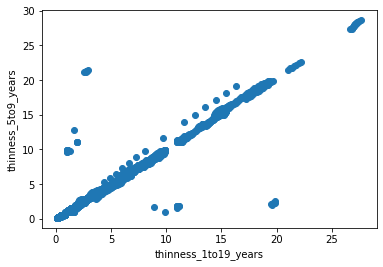

In [ ]:
# Before we clean the sub-set of data and build the model, we realize the attribute of 'thinness_1to19_years' and 'thinness_5to9_years' are not independant
# parameters, so we will use one of them to reduce the redundancy.
plt.scatter(x=df_neg['thinness_1to19_years'], y=df_neg['thinness_5to9_years'] )
plt.xlabel('thinness_1to19_years')
plt.ylabel('thinness_5to9_years')
plt.show()

In [ ]:
# Let's drop the 'thinness_5to9_years' from df_neg and remove the null values.
df_neg=df_neg.drop('thinness_5to9_years', axis=1)
df_neg=df_neg.dropna()
df_neg.reset_index(drop=True, inplace=True)

In [ ]:
# Then, we will build the model using the following three attributes:

m_neg = sm.ols('Life_Expectancy ~ Adult_Mortality + HIV + thinness_1to19_years', data = df_neg).fit()

m_neg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1479.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:24   Log-Likelihood:                -9278.5
No. Observations:                2896   AIC:                         1.857e+04
Df Residuals:                    2892   BIC:                         1.859e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               79.0477      0.207    382.186      0.000      78.642      79.453
Adult_Mortality         -0.0364      0.001    -33.606      0.000      -0.039      -0.034
HIV                     -0.4688      0.026    -18.350      0.000      -0.519      -0.419
thinness_1to19_years    -0.6050      0.026    -22.962      0.000      -0.657      -0.553
==============================================================================
Omnibus:                      526.674   Durbin-Watson:                   0.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1284.108
Skew:                          -1.004   Prob(JB):                    1.44e-279
Kurtosis:                       5.570   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

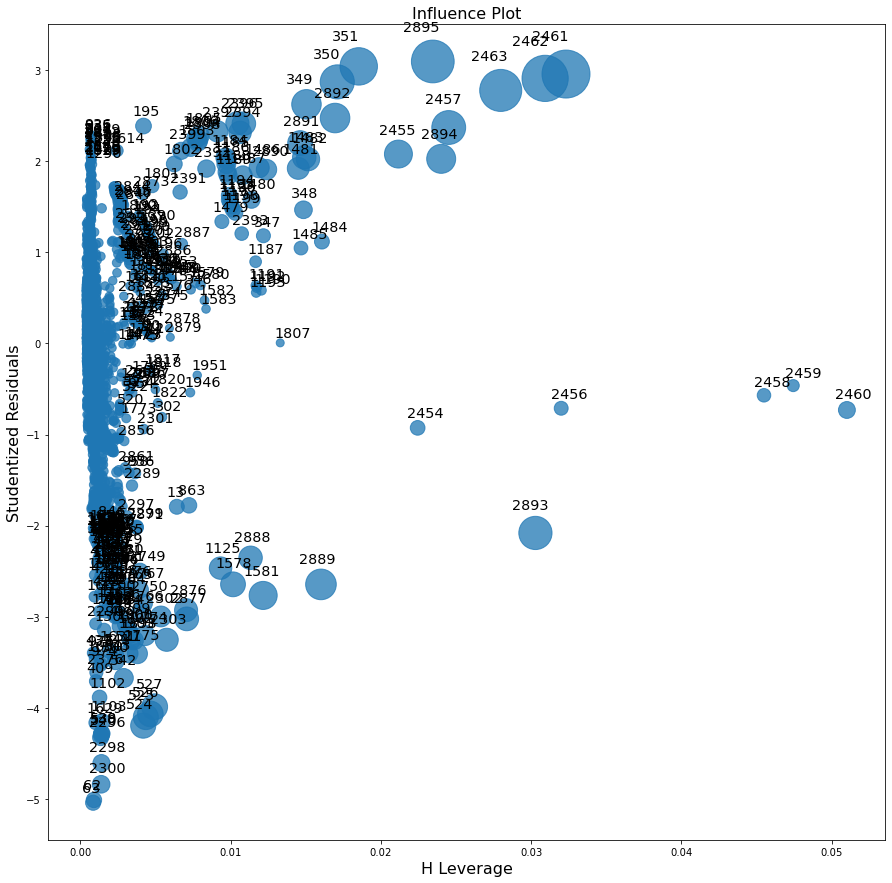

In [ ]:
# Next, we will do influence plot to identify the points contribute significant error and remove them to improve the model:
fig, ax = plt.subplots(figsize=(15,15))
fig = influence_plot(m_neg, ax=ax)

In [ ]:
df_neg_clean=df_neg.drop(index=[349,350,351,2889,2893,2895,538,2461,2462,2463])
print(len(df_neg_clean))

m_neg_clean = sm.ols('Life_Expectancy ~ Adult_Mortality + HIV + thinness_1to19_years', data = df_neg_clean).fit()

m_neg_clean.summary()

2886


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1505.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:29   Log-Likelihood:                -9204.0
No. Observations:                2886   AIC:                         1.842e+04
Df Residuals:                    2882   BIC:                         1.844e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               79.1577      0.205    386.545      0.000      78.756      79.559
Adult_Mortality         -0.0366      0.001    -33.970      0.000      -0.039      -0.035
HIV                     -0.5300      0.028    -19.097      0.000      -0.584      -0.476
thinness_1to19_years    -0.6033      0.026    -23.225      0.000      -0.654      -0.552
==============================================================================
Omnibus:                      514.899   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1251.817
Skew:                          -0.988   Prob(JB):                    1.48e-272
Kurtosis:                       5.551   Cond. No.                         381.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Since the index from the influence plot is messy and many points are overlapped with each other, we have to relay on other method to identify the 
# outliers and remove them according.

m_neg_outlier=m_neg.outlier_test()
m_neg_outlier['abs_resid']=abs(m_neg_outlier['student_resid'])
m_neg_outlier.sort_values(by=['bonf(p)'], ascending=True).head(10)

student_resid       unadj_p   bonf(p)  abs_resid
63        -5.039397  4.957556e-07  0.001436   5.039397
62        -5.008886  5.803697e-07  0.001681   5.008886
2300      -4.836984  1.387284e-06  0.004018   4.836984
2298      -4.604319  4.316824e-06  0.012502   4.604319
2296      -4.324699  1.579093e-05  0.045731   4.324699
540       -4.299057  1.771994e-05  0.051317   4.299057
539       -4.282390  1.909211e-05  0.055291   4.282390
538       -4.279802  1.931405e-05  0.055933   4.279802
524       -4.193767  2.826060e-05  0.081843   4.193767
1629      -4.161366  3.255784e-05  0.094288   4.161366

In [ ]:
# We are goint to remove the following points that contribute more error.

df_neg_clean1=df_neg.drop(index=[62,63,524,538,540,1629,2296,2298,2300])
print(len(df_neg_clean1))

2887


In [ ]:
m_neg_clean1 = sm.ols('Life_Expectancy ~ Adult_Mortality + HIV + thinness_1to19_years', data = df_neg_clean1).fit()

m_neg_clean1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1592.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:32   Log-Likelihood:                -9158.4
No. Observations:                2887   AIC:                         1.832e+04
Df Residuals:                    2883   BIC:                         1.835e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               79.2694      0.201    394.184      0.000      78.875      79.664
Adult_Mortality         -0.0375      0.001    -35.639      0.000      -0.040      -0.035
HIV                     -0.4481      0.025    -18.049      0.000      -0.497      -0.399
thinness_1to19_years    -0.6032      0.026    -23.602      0.000      -0.653      -0.553
==============================================================================
Omnibus:                      414.677   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              839.239
Skew:                          -0.873   Prob(JB):                    5.77e-183
Kurtosis:                       4.981   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_neg_o1=df_neg
Q1_neg = df_neg_o1.quantile(0.25)
Q2_neg =df_neg_o1.quantile(0.75)
IQR = Q2_neg - Q1_neg

print(IQR)
lower_bound_val = Q1_neg - (1.5 * IQR) 
upper_bound_val = Q2_neg + (1.5 * IQR)
df_neg_clean2 = df_neg_o1[~((df_neg_o1 < lower_bound_val) |(df_neg_o1 > upper_bound_val)).any(axis=1)]

m_neg_clean2 = sm.ols('Life_Expectancy ~ Adult_Mortality + HIV + thinness_1to19_years', data = df_neg_clean2).fit()

m_neg_clean2.summary()

Adult_Mortality         152.000
HIV                       0.700
thinness_1to19_years      5.600
Life_Expectancy          12.225
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1185.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:32   Log-Likelihood:                -6476.4
No. Observations:                2279   AIC:                         1.296e+04
Df Residuals:                    2275   BIC:                         1.298e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               81.2501      0.178    457.294      0.000      80.902      81.598
Adult_Mortality         -0.0397      0.001    -32.299      0.000      -0.042      -0.037
HIV                     -5.6032      0.297    -18.880      0.000      -6.185      -5.021
thinness_1to19_years    -0.5206      0.028    -18.531      0.000      -0.576      -0.466
==============================================================================
Omnibus:                      129.129   Durbin-Watson:                   0.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.427
Skew:                          -0.424   Prob(JB):                     3.38e-51
Kurtosis:                       4.315   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

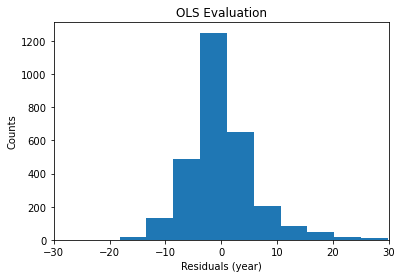

RMSE: 5.959464275245419


<Figure size 432x288 with 0 Axes>

In [ ]:
df_neg['Life_Expectancy_Pred']=m_neg.predict(df_neg)
df_neg['Residuals']= df_neg['Life_Expectancy_Pred'] - df_neg['Life_Expectancy']

plt.hist('Residuals', data=df_neg)
plt.title('OLS Evaluation')
plt.xlim(-30,30)
plt.xlabel('Residuals (year)')
plt.ylabel('Counts')
plt.show()
plt.savefig('OLS.png', dpi=300)

print('RMSE:', np.sqrt(sum(df_neg['Residuals']**2)/len(df_neg)))

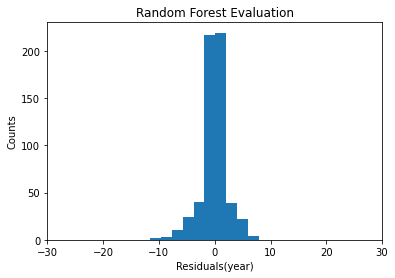

RMSE: 2.267351736201402


In [ ]:
# Let's try another machine learning tool 'Random forest' to see if it works as well:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X=df_neg.iloc[:,0:3]
y=df_neg.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor_neg = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_neg.fit(X_train, y_train)
y_pred = regressor_neg.predict(X_test)

residue =y_pred-y_test
plt.hist(residue)
plt.title('Random Forest Evaluation')
plt.xlim(-30,30)
plt.xlabel('Residuals(year)')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# In comparison, the Random Forest Evaluation is better than the OLS as least in terms of residuals.

#### Health - Non-Immunization Analysis - END

### ###########################################################

#### Economics Analysis - START

In [ ]:
df = df_master

In [ ]:
# creating new subset with attributes in question
data = df[['Country','Life_Expectancy','GDP','Tot_Exp','Population']].copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2938 non-null   object 
 1   Life_Expectancy  2928 non-null   float64
 2   GDP              2490 non-null   float64
 3   Tot_Exp          2712 non-null   float64
 4   Population       2286 non-null   float64
dtypes: float64(4), object(1)
memory usage: 114.9+ KB


In [ ]:
data = data.dropna()

# GDP

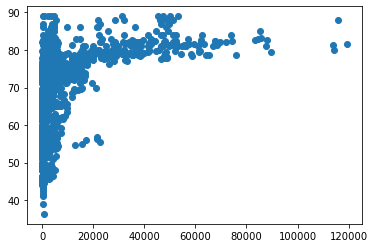

In [ ]:
# scatter plot of GDP with Life Expectancy
plt.scatter(data['GDP'], data['Life_Expectancy'])

In [ ]:
# GDP Life expectancy original Linear Regression

results1 = sm.ols("Life_Expectancy ~ GDP",data = data).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     590.7
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          2.65e-115
Time:                        21:19:33   Log-Likelihood:                -7601.6
No. Observations:                2120   AIC:                         1.521e+04
Df Residuals:                    2118   BIC:                         1.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.3706      0.211    314.794      0.0

C:\Users\harth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP', ylabel='y_transformed'>

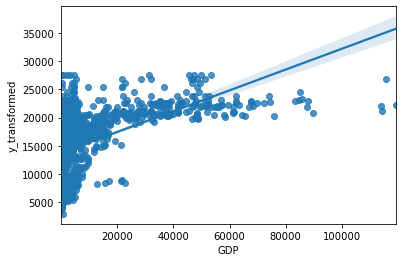

In [ ]:
# As data seems to be exponential, use BoxCox Transformation
y_transformed, lmbda = scipy.stats.boxcox(data.Life_Expectancy)
data ['y_transformed'] = y_transformed
sns.regplot(data.GDP, data.y_transformed)

In [ ]:
# transformed data linear regression

results2 = sm.ols("y_transformed ~ GDP",data = data).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     750.0
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          1.28e-141
Time:                        21:19:33   Log-Likelihood:                -20718.
No. Observations:                2120   AIC:                         4.144e+04
Df Residuals:                    2118   BIC:                         4.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.378e+04    102.567    134.345      0.0

Text(0, 0.5, 'y')

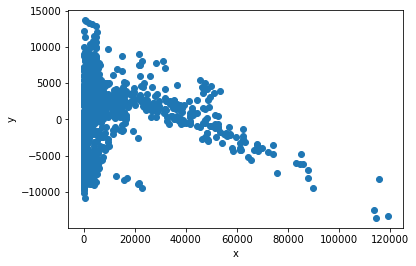

In [ ]:
#residual plot
plt.scatter(data['GDP'],data['y_transformed'] - results2.fittedvalues)
plt.xlabel('x')
plt.ylabel('y')


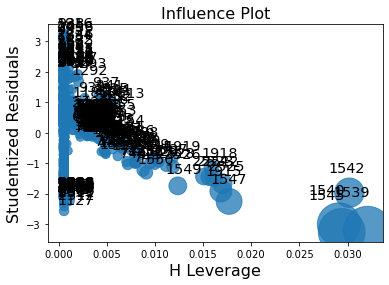

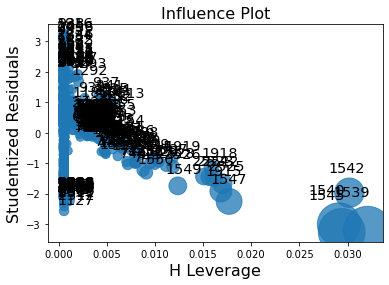

In [ ]:
#identify outliers
results = sm.ols('y_transformed ~ GDP', data=data).fit()
sm2.graphics.influence_plot(results)

In [ ]:
#try to remove 1542,1539,1545,1540

data_drop = data.drop([1542,1539,1545,1540])

In [ ]:
#new Linear Regression
results3 = sm.ols("y_transformed ~ GDP",data = data_drop).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     783.8
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          5.64e-147
Time:                        21:19:39   Log-Likelihood:                -20663.
No. Observations:                2116   AIC:                         4.133e+04
Df Residuals:                    2114   BIC:                         4.134e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.371e+04    102.477    133.749      0.0

Text(0, 0.5, 'y')

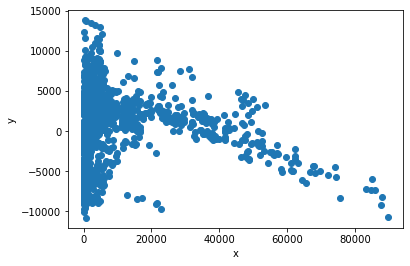

In [ ]:
#residual plot after drop
plt.scatter(data['GDP'],data['y_transformed'] - results3.fittedvalues)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# comparing coefficient 
#before drop coefficient = 0.1839, SE = 0.007, where after drop coefficient is 0.1987, SE = 0.007
#standard error

SE = math.sqrt(0.007**2 + 0.007**2)
pValue = (1 - scipy.stats.norm.cdf((0.1987-0.1839)/SE)) * 2
pValue

0.1349077178260547

The pvalue is not less than 0.05, thus we should not drop the outliers. 

With all these cleaning, the r-squared is still only at 0.27, thus this attribute will not be used.

# Total Expenditure

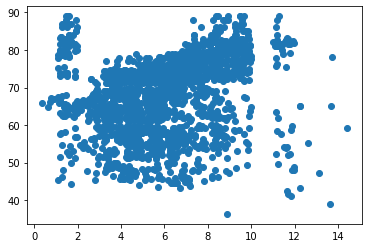

In [ ]:
plt.scatter(data['Tot_Exp'], data['Life_Expectancy'])

In [ ]:
# Tot_Exp Life expectancy original Linear

results4 = sm.ols("Life_Expectancy ~ Tot_Exp",data = data).fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           3.81e-28
Time:                        21:19:39   Log-Likelihood:                -7801.8
No. Observations:                2120   AIC:                         1.561e+04
Df Residuals:                    2118   BIC:                         1.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.6961      0.569    110.140      0.0

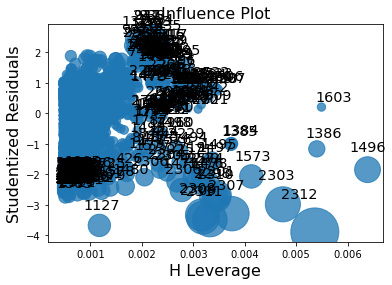

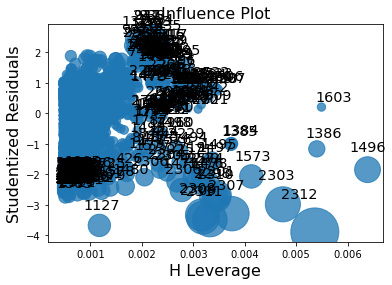

In [ ]:
#identify outliers

life = sm.ols('Life_Expectancy ~ Tot_Exp', data=data).fit()
sm2.graphics.influence_plot(life)

In [ ]:
# remove index 1603,1386,1496,2312,2303,1573
life_drop = data.drop([1603,1386,1496,2312,2303,1573])

#new Linear Regression
results5 = sm.ols("Life_Expectancy ~ Tot_Exp",data = life_drop).fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     141.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.36e-31
Time:                        21:19:45   Log-Likelihood:                -7765.9
No. Observations:                2114   AIC:                         1.554e+04
Df Residuals:                    2112   BIC:                         1.555e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3147      0.571    109.119      0.0

C:\Users\harth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tot_Exp', ylabel='y_transformed'>

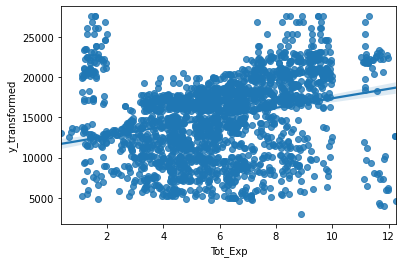

In [ ]:
# attempt on transforming data using y-transformed boxcox data

y_transformed, lmbda = scipy.stats.boxcox(data.Life_Expectancy)
data ['y_transformed'] = y_transformed
sns.regplot(life_drop.Tot_Exp, life_drop.y_transformed)

In [ ]:
#new linear regression:

results6 = sm.ols("y_transformed ~ Tot_Exp",data = life_drop).fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           4.88e-39
Time:                        21:19:45   Log-Likelihood:                -20891.
No. Observations:                2114   AIC:                         4.179e+04
Df Residuals:                    2112   BIC:                         4.180e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.149e+04    283.875     40.480      0.0

After transformation, r-squared did not pass 0.1. Attribute is thus removed from final analysis.

# Population

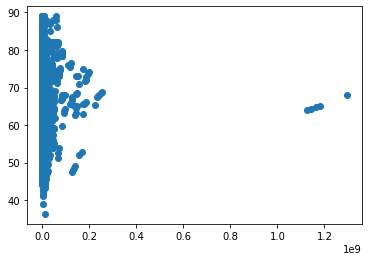

In [ ]:
plt.scatter(data['Population'], data['Life_Expectancy'])

In [ ]:
# Population Life expectancy original Linear

results1 = sm.ols("Life_Expectancy ~ Population",data = data).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.047
Date:                Mon, 02 Aug 2021   Prob (F-statistic):              0.306
Time:                        21:19:45   Log-Likelihood:                -7861.9
No. Observations:                2120   AIC:                         1.573e+04
Df Residuals:                    2118   BIC:                         1.574e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.6529      0.219    313.536      0.0

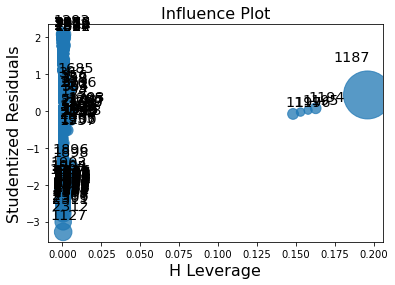

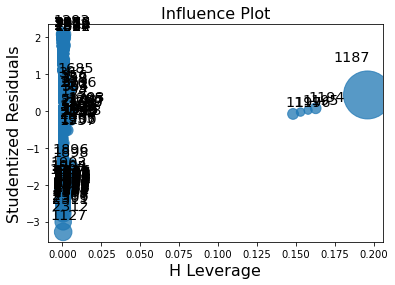

In [ ]:
#identify outliers

pop = sm.ols('Life_Expectancy ~ Population', data=data).fit()
sm2.graphics.influence_plot(pop)

In [ ]:
# remove index 1187, 1199,1194,1195,1196,1197
pop_drop = data.drop([1187,1199,1194,1195,1196,1197])

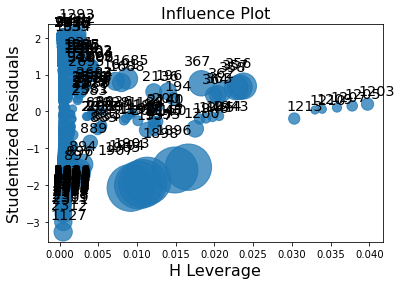

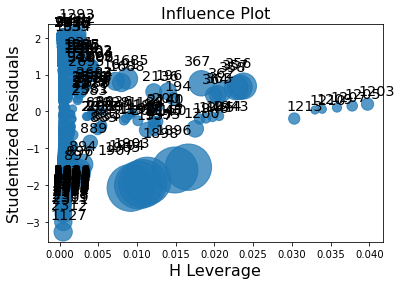

In [ ]:
pops = sm.ols('Life_Expectancy ~ Population', data=pop_drop).fit()
sm2.graphics.influence_plot(pops)

In [ ]:
#new Linear Regression
results8 = sm.ols("Life_Expectancy ~ Population",data = pop_drop).fit()
print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6901
Date:                Mon, 02 Aug 2021   Prob (F-statistic):              0.406
Time:                        21:19:54   Log-Likelihood:                -7842.3
No. Observations:                2114   AIC:                         1.569e+04
Df Residuals:                    2112   BIC:                         1.570e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.6858      0.230    298.684      0.0

R-squared still at 0 after extensive removal of outliers, population attribute will not be used.

# Linear Regression with all 3 variables

In [ ]:
# Linear Regression of all 3 variables
results10 = sm.ols("Life_Expectancy ~ GDP + Tot_Exp + Population",data = data).fit()
print(results10.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          2.26e-122
Time:                        21:19:54   Log-Likelihood:                -7578.9
No. Observations:                2120   AIC:                         1.517e+04
Df Residuals:                    2116   BIC:                         1.519e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1882      0.519    121.777      0.0

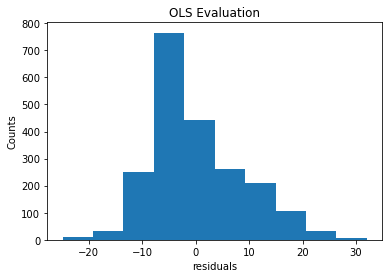

RMSE: 8.636587386743685


In [ ]:
#calculate RMSE from OLS
data['Life_Expectancy_Pred']=results10.predict(data)
data['Residuals']= data['Life_Expectancy_Pred'] - data['Life_Expectancy']

plt.hist('Residuals', data=data)
plt.title('OLS Evaluation')
plt.xlabel('residuals')
plt.ylabel('Counts')
plt.show()


print('RMSE:', np.sqrt(sum(data['Residuals']**2)/len(data)))

In [ ]:
# Linear Regression of all 3 variables, using boxcox transformed y-data
results11 = sm.ols("y_transformed ~ GDP + Tot_Exp + Population",data = data).fit()
print(results11.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     279.1
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          1.28e-152
Time:                        21:19:54   Log-Likelihood:                -20686.
No. Observations:                2120   AIC:                         4.138e+04
Df Residuals:                    2116   BIC:                         4.140e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.196e+04    251.317     47.574      0.0

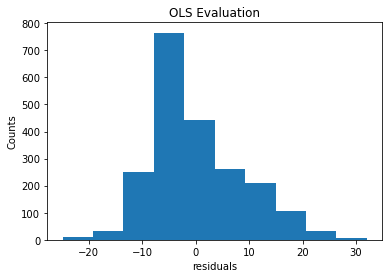

RMSE: 8.636587386743685


In [ ]:
#calculate RMSE of boxcox transformation from OLS
data['Life_Expectancy_Pred']=results10.predict(data)
data['Residuals']= data['Life_Expectancy_Pred'] - data['Life_Expectancy']

plt.hist('Residuals', data=data)
plt.title('OLS Evaluation')
plt.xlabel('residuals')
plt.ylabel('Counts')
plt.show()


print('RMSE:', np.sqrt(sum(data['Residuals']**2)/len(data)))

Boxcox transformed RMSE is extremely high and the residual is not normal, thus transformation is rejected.

In [ ]:
# Try RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
data.head()

Country  Life_Expectancy         GDP  Tot_Exp  Population  \
0  Afghanistan             65.0  584.259210     8.16  33736494.0   
1  Afghanistan             59.9  612.696514     8.18    327582.0   
2  Afghanistan             59.9  631.744976     8.13  31731688.0   
3  Afghanistan             59.5  669.959000     8.52   3696958.0   
4  Afghanistan             59.2   63.537231     7.87   2978599.0   

   y_transformed  Life_Expectancy_Pred  Residuals  
0   12649.589078             67.899155   2.899155  
1   10328.934062             67.909781   8.009781  
2   10328.934062             67.896841   7.996841  
3   10158.693519             68.116922   8.616922  
4   10032.119706             67.567005   8.367005

                GDP  Tot_Exp    Population
0        584.259210     8.16  3.373649e+07
1        612.696514     8.18  3.275820e+05
2        631.744976     8.13  3.173169e+07
3        669.959000     8.52  3.696958e+06
4         63.537231     7.87  2.978599e+06
5        553.328940     9.20  2.883167e+06
6        445.893298     9.42  2.843310e+05
7        373.361116     8.33  2.729431e+06
8        369.835796     6.73  2.661679e+07
9        272.563770     7.43  2.589345e+06
10        25.294130     8.70  2.577980e+05
11       219.141353     8.79  2.411898e+07
12       198.728544     8.82  2.364851e+06
13       187.845950     7.76  2.197992e+07
14       117.496980     7.80  2.966463e+06
15       114.560000     8.20  2.937560e+05
16      3954.227830     6.00  2.887300e+04
17      4575.763787     5.88  2.889140e+05
18      4414.723140     5.66  2.895920e+05
19      4247.614380     5.59  2.941000e+03
20      4437.178680     5.71  2.951950e+05
21       494.358832     5.34  2.913210e+05
22      411

2937     547.358878     7.10  1.222225e+07


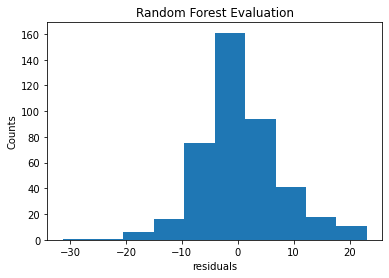

RMSE: 7.256622175705678


In [ ]:
X=data.iloc[:,2:5]
y=data.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

print(X)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

residue =y_pred-y_test
plt.hist(residue)
plt.title('Random Forest Evaluation')
plt.xlabel('residuals')
plt.ylabel('Counts')
plt.show()

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest improved the final RMSE but not by a lot, these 3 attributes cannot be used together.

#### Economics Analysis - END

### ###########################################################

#### Social Analysis - START

In [ ]:
df = df_master

In [ ]:
# creating new subset with attributes in question
data = df[['Schooling','Alcohol','Income_Comp_Of_Resources','Life_Expectancy']].copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Schooling                 2775 non-null   float64
 1   Alcohol                   2744 non-null   float64
 2   Income_Comp_Of_Resources  2771 non-null   float64
 3   Life_Expectancy           2928 non-null   float64
dtypes: float64(4)
memory usage: 91.9 KB


In [ ]:
df = data.dropna()

### Alcohol

Text(0, 0.5, 'Life_Expectancy')

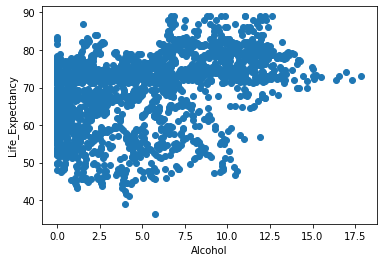

In [ ]:
# scatter plot of Alcohol with Life Expectancy
plt.scatter(df['Alcohol'], df ['Life_Expectancy'])
plt.xlabel('Alcohol')
plt.ylabel('Life_Expectancy')


In [ ]:
# Alcohol Life expectancy original Linear Regression
from statsmodels.formula.api import ols
from statsmodels.formula.api import ols
results1 = sm.ols("Life_Expectancy ~ Alcohol",data = df ).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     439.7
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.76e-90
Time:                        21:19:55   Log-Likelihood:                -9248.3
No. Observations:                2584   AIC:                         1.850e+04
Df Residuals:                    2582   BIC:                         1.851e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.2597      0.257    253.637      0.0

<ipython-input-460-28edbf9959b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_transformed'] = y_transformed
C:\Users\harth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='y_transformed'>

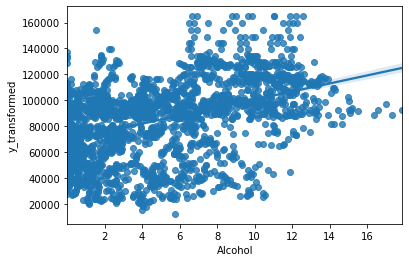

In [ ]:
# As data seems to be exponential, use BoxCox Transformation
y_transformed, lmbda = scipy.stats.boxcox(df.Life_Expectancy)
df['y_transformed'] = y_transformed
sns.regplot(df .Alcohol, df .y_transformed)

In [ ]:
# transformed data linear regression

results2 = sm.ols("y_transformed ~ Alcohol",data = df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     559.6
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          3.85e-112
Time:                        21:19:56   Log-Likelihood:                -30008.
No. Observations:                2584   AIC:                         6.002e+04
Df Residuals:                    2582   BIC:                         6.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.944e+04    793.603     87.504      0.0

Text(0, 0.5, 'y')

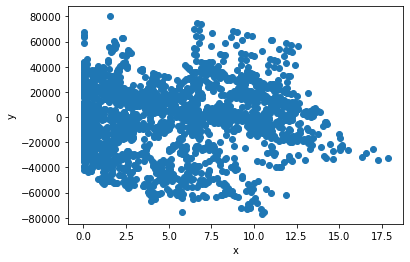

In [ ]:
#residual plot
plt.scatter(df['Alcohol'],df['y_transformed'] - results2.fittedvalues)
plt.xlabel('x')
plt.ylabel('y')


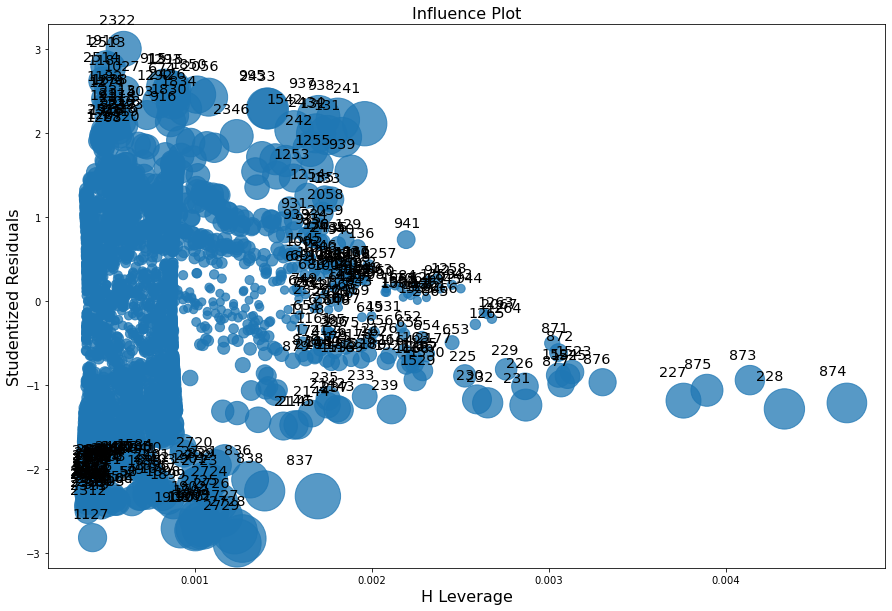

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
fig = influence_plot(results2, ax=ax)

#### Conclusion(Alcohol):
    
    R-squared:0.146,Kurtosis:3.422
            
After transformed:
    
    R-squared:0.178,Kurtosis:2.812
    

    

### Schooling

Text(0, 0.5, 'Life_Expectancy')

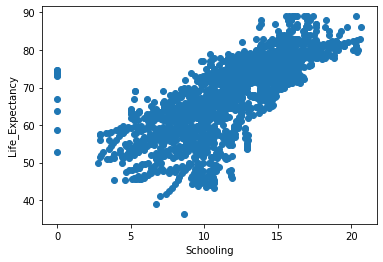

In [ ]:
# scatter plot of Schooling with Life Expectancy
plt.scatter(df['Schooling'], df ['Life_Expectancy'])
plt.xlabel('Schooling')
plt.ylabel('Life_Expectancy')



In [ ]:
# # Schooling Life expectancy original Linear Regression
from statsmodels.formula.api import ols
results_1 = sm.ols("Life_Expectancy ~ Schooling",data = df ).fit()
print(results_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     3241.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:20:00   Log-Likelihood:                -8400.7
No. Observations:                2584   AIC:                         1.681e+04
Df Residuals:                    2582   BIC:                         1.682e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.6310      0.467     93.369      0.0

<ipython-input-466-894f36b033e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['y_transformed'] = y_transformed
C:\Users\harth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Schooling', ylabel='y_transformed'>

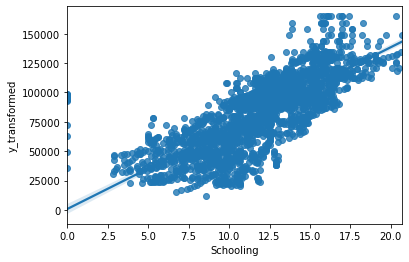

In [ ]:
# As data seems to be exponential, use BoxCox Transformation
y_transformed, lmbda = scipy.stats.boxcox(df.Life_Expectancy)
df ['y_transformed'] = y_transformed
sns.regplot(df.Schooling, df.y_transformed)

In [ ]:
# transformed data linear regression
results_2 = sm.ols("y_transformed ~ Schooling",data = df).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     3633.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:20:01   Log-Likelihood:                -29127.
No. Observations:                2584   AIC:                         5.826e+04
Df Residuals:                    2582   BIC:                         5.827e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    771.2019   1422.586      0.542      0.5

Text(0, 0.5, 'y')

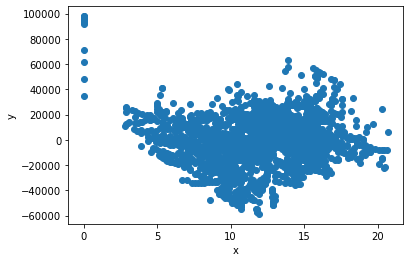

In [ ]:

#residual plot
plt.scatter(df['Schooling'],df['y_transformed'] - results_2.fittedvalues)
plt.xlabel('x')
plt.ylabel('y')

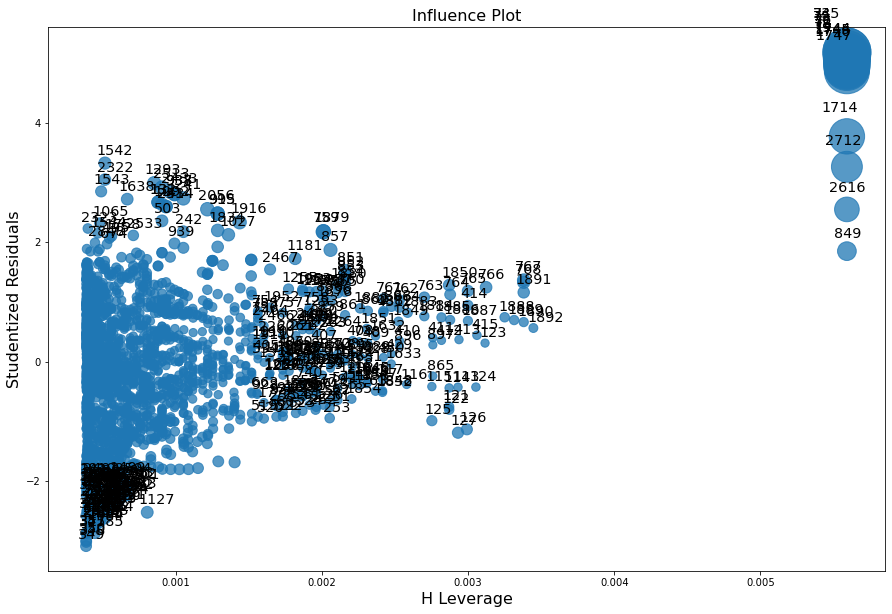

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
fig = influence_plot(results_2, ax=ax)

#### Conclusion(Schooling):
    
    R-squared:0.557,Kurtosis:6.087
            
After transformed:
    
    R-squared:0.585,Kurtosis:5.504
    

### Income_Comp_Of_Resources

Text(0, 0.5, 'Life_Expectancy')

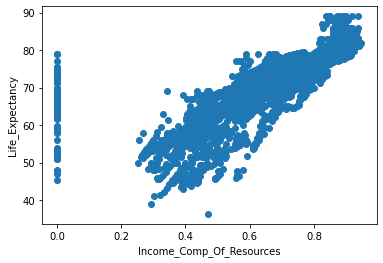

In [ ]:
# scatter plot of Alcohol with Life Expectancy
plt.scatter(df['Income_Comp_Of_Resources'], df ['Life_Expectancy'])
plt.xlabel('Income_Comp_Of_Resources')
plt.ylabel('Life_Expectancy')

In [ ]:
# Alcohol Life expectancy original Linear Regression
from statsmodels.formula.api import ols
results_3 = sm.ols("Life_Expectancy ~ Income_Comp_Of_Resources",data = df ).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     2664.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:20:06   Log-Likelihood:                -8535.5
No. Observations:                2584   AIC:                         1.708e+04
Df Residuals:                    2582   BIC:                         1.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<ipython-input-472-d3868b2b8d42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['y_transformed'] = y_transformed
C:\Users\harth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_Comp_Of_Resources', ylabel='y_transformed'>

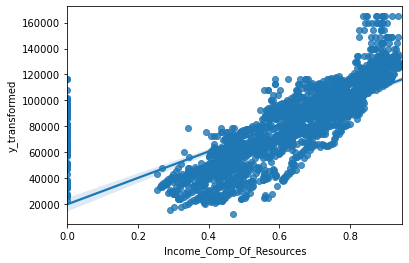

In [ ]:

# As data seems to be exponential, use BoxCox Transformation
y_transformed, lmbda = scipy.stats.boxcox(df.Life_Expectancy)
df ['y_transformed'] = y_transformed
sns.regplot(df.Income_Comp_Of_Resources, df.y_transformed) 

In [ ]:
# transformed data linear regression
results_4 = sm.ols("y_transformed ~ Income_Comp_Of_Resources",data = df).fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2887.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:20:06   Log-Likelihood:                -29292.
No. Observations:                2584   AIC:                         5.859e+04
Df Residuals:                    2582   BIC:                         5.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Text(0, 0.5, 'y')

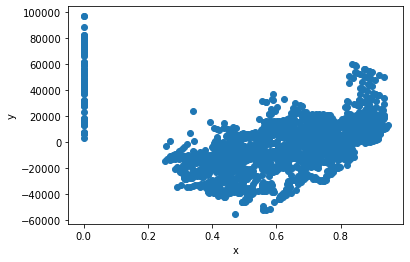

In [ ]:
#residual plot
plt.scatter(df['Income_Comp_Of_Resources'],df['y_transformed'] - results_4.fittedvalues)
plt.xlabel('x')
plt.ylabel('y')

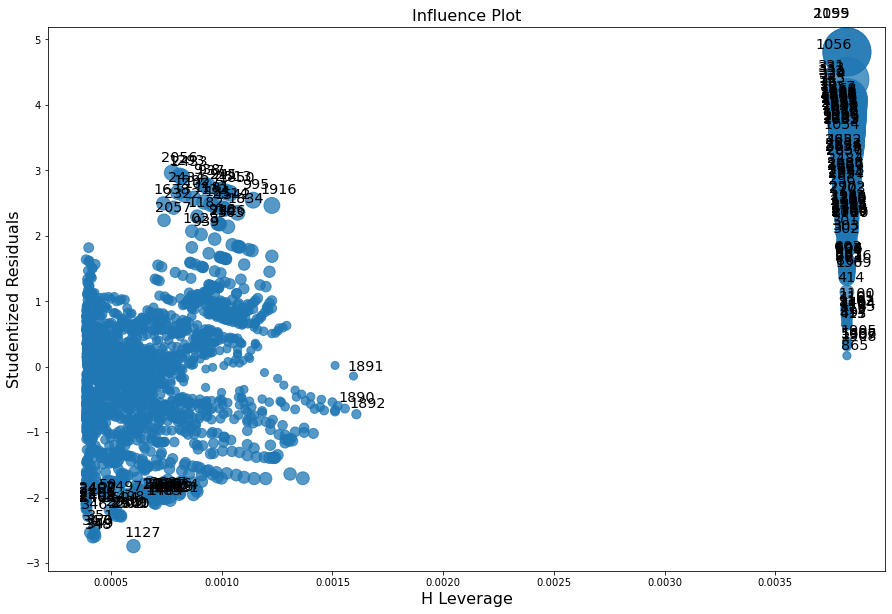

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
fig = influence_plot(results_4, ax=ax)

#### Conclusion(Income_Comp_Of_Resources):
    
    R-squared: 0.508,Kurtosis:6.342
            
After transformed:
    
    R-squared:0.528,Kurtosis:5.816
           

### Adding all these three:
    
    

#### 'Schooling'+'Alcohol'+'Income_Comp_Of_Resources'

In [1]:
results_4 = sm.ols('Life_Expectancy ~ Schooling + Income_Comp_Of_Resources+Alcohol', data = df).fit()

results_4 .summary()

NameError: ignored

In [ ]:
df.shape

#### Removing outliers 

#### IQR score:
Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

Wikipedia Definition:

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, 

IQR = Q3 − Q1.


The IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR

In [ ]:
df_o1=df

In [ ]:
Q1 = df_o1.quantile(0.25)
Q3 =df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
## Find the lower bound value and the higher bound value

lower_bound_val = Q1 - (1.5 * IQR) 
upper_bound_val = Q3 + (1.5 * IQR)

In [ ]:
#df2_out = df2_o1[~((df2_o1 < (Q1 - 1.5 * IQR)) |(df2_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out = df_o1[~((df_o1 < lower_bound_val) |(df_o1 > upper_bound_val)).any(axis=1)]

In [ ]:
df_out.shape

In [ ]:
result_5 = sm.ols('Life_Expectancy ~ Schooling + Income_Comp_Of_Resources+Alcohol', data = df_out).fit()

result_5.summary()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
fig = influence_plot(result_5, ax=ax)

#### Conclusion:

Adding all these three:'Schooling','Alcohol','Income_Comp_Of_Resources'

From the above result:

Before outliers:         R-squared:0.600,Kurtosis:7.126

After removing outliers: R-squared:0.794,Kurtosis:4.671

After removing outliers R-squared and Kurtosis were better



#### Social Analysis - END

### Notebook End

In [ ]:
#a check to ensure all cells above ran successfully (for the execution of "Cell->Run All")
from datetime import datetime
datetime.now().strftime("%d/%m/%Y %H:%M:%S")

'02/08/2021 21:20:38'